## Questions
1. How the room types impact the house interest level?
2. Are listing time playing an important role here?
3. How geographic factor affect the interest level of a listing?

### Import and Read Data

In [30]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Seaborn style
sns.set_style("whitegrid")

In [31]:
# Import Data
train_data = pd.read_json('train.json')
# Take a look
train_data.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low


### Check Data

In [32]:
train_data.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

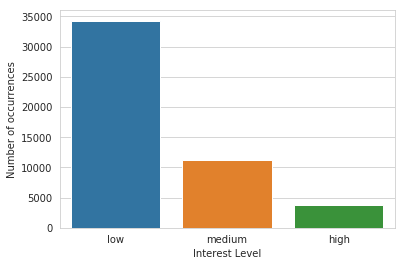

In [33]:
# Target variable exploration
sns.countplot(train_data.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [34]:
# Quantitative substitute of Interest Level
train_data['interest'] = np.where(train_data.interest_level=='low', 0,
                                  np.where(train_data.interest_level=='medium', 1, 2))

## Room types

### Bathroom

/home/tree/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


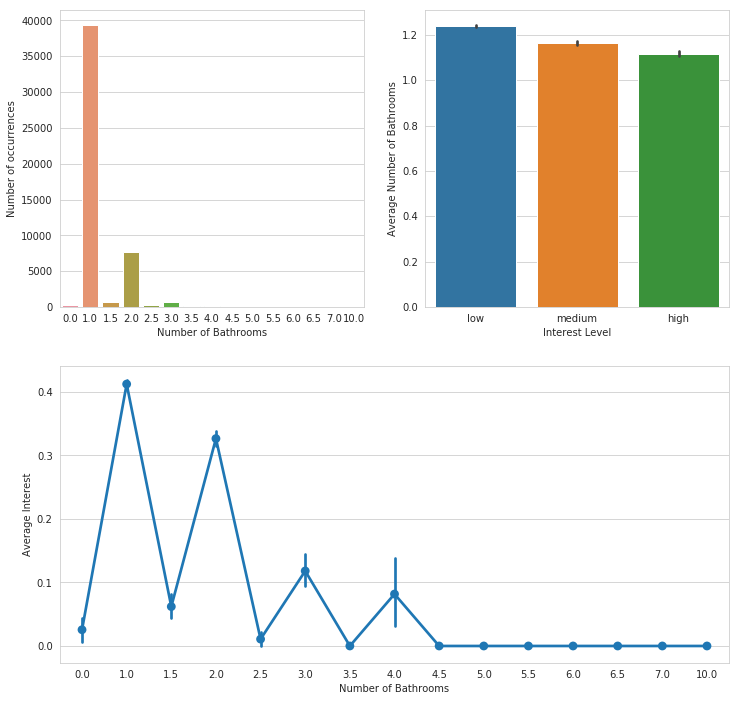

In [35]:
# Bathrooms graphs
fig = plt.figure(figsize=(12,12))
# Number of occurrences
sns.countplot(train_data.bathrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');
# Average number of Bathrooms per Interest Level
sns.barplot(x='interest_level', y='bathrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');
# Average interest for every number of bathrooms
sns.pointplot(x="bathrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Average Interest');

### Bedroom

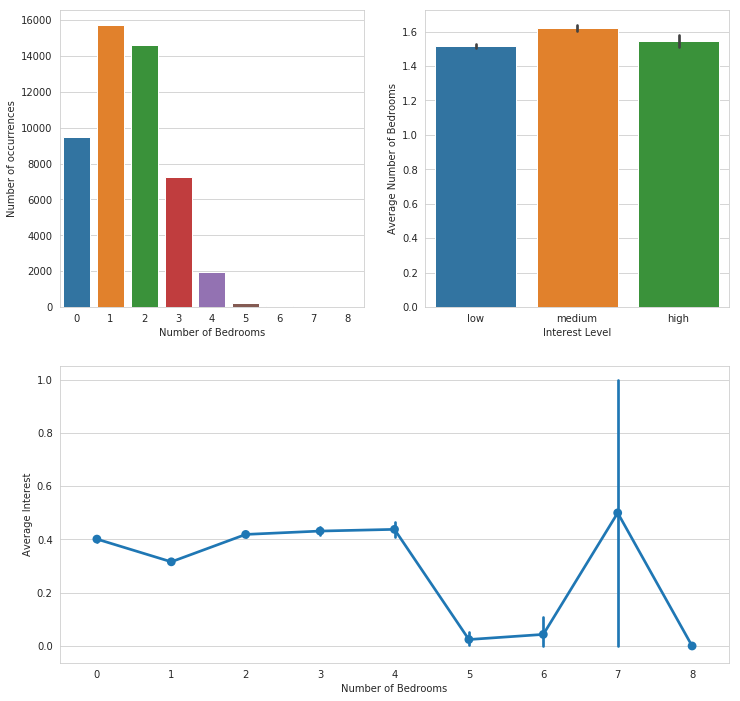

In [36]:
# Bedrooms graphs
fig = plt.figure(figsize=(12,12))
# Number of occurrences
sns.countplot(train_data.bedrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');
# Average number of Bedrooms per Interest Level
sns.barplot(x='interest_level', y='bedrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bedrooms');
# Average interest for every number of bedrooms
sns.pointplot(x="bedrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Average Interest');

### Answer 1
* So most popular room type is 1 bedroom and 1 bathroom, this type of unit tends to appear the most times and have a relatively higher interest level
* When number of bathroom goes over 4, the average interest level goes to 0, so this is a interesting thing
* On the bedroom side, the situation is not very same, clearly there are some demand for more bedrooms in one unit

In [37]:
# Most advertised buildings
train_data.building_id.value_counts().nlargest(10)

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
Name: building_id, dtype: int64

## Date and Time

In [39]:
# Convertion to Python Date
train_data.created = pd.to_datetime(train_data.created, format='%Y-%m-%d %H:%M:%S')

In [40]:
# New Month, Day of Week and Hour Features
train_data['month'] = train_data.created.dt.month
train_data['day_of_week'] = train_data.created.dt.weekday_name
train_data['hour'] = train_data.created.dt.hour

In [41]:
# First date in DataFrame
print('First advert created at {}'.format(train_data.created.nsmallest(1).values[0]))

First advert created at 2016-04-01T22:12:41.000000000


In [42]:
# Last date in DataFrame
print('Last advert created at {}'.format(train_data.created.nlargest(1).values[0]))

Last advert created at 2016-06-29T21:41:47.000000000


### Month

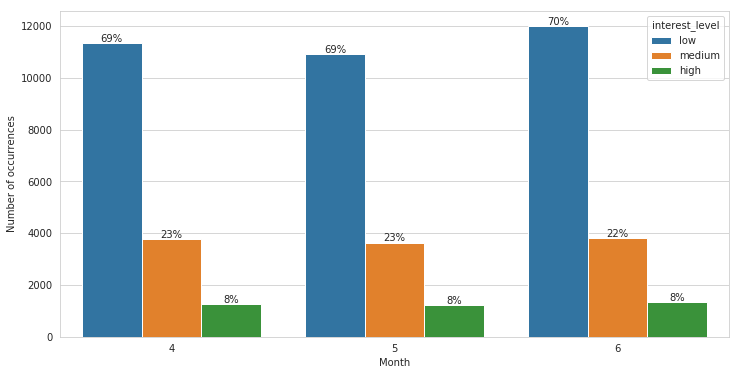

In [43]:
# Iterest per month
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=train_data);
plt.xlabel('Month');
plt.ylabel('Number of occurrences')

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

### Day of Week

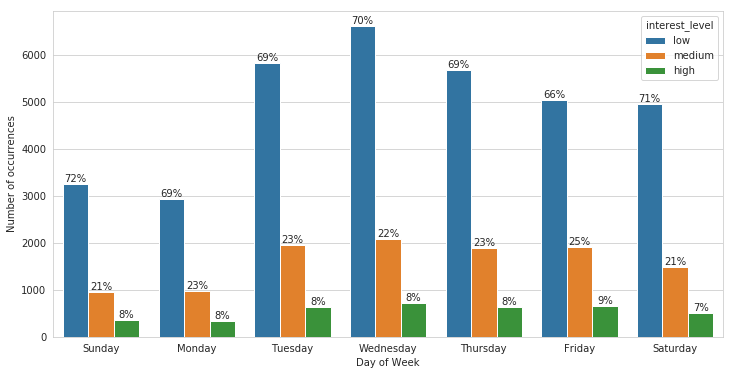

In [44]:
# Iterest per Day of Week
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="day_of_week", hue="interest_level",
                   hue_order=['low', 'medium', 'high'], data=train_data,
                   order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
plt.xlabel('Day of Week');
plt.ylabel('Number of occurrences');

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

### Hour of Day

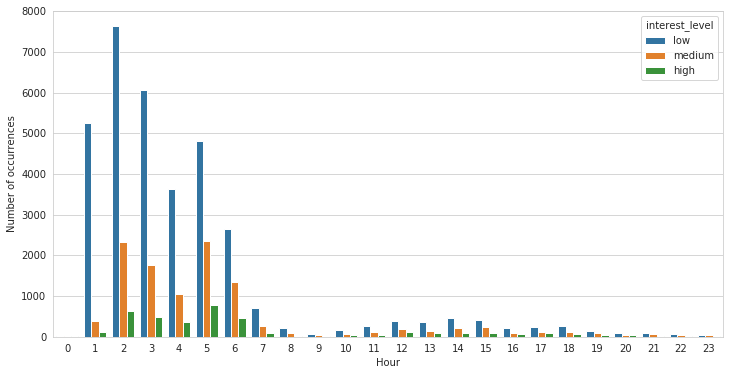

In [46]:
# Iterest per Hour of Day
fig = plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train_data);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

### Answer 2
* So the number of listing per month are stable and the portion of the high interest ones are also staying at a certain level.
* In the middle of week, people tend to post more listing. On weekends, there were less listings. But the relative ratios between interest levels are stable. So date factor is not playing an important role
* The hour of day is an interesting one here, people mostly posted their offer during the night. And most the high interest level listings are fall into the interval between 2 AM and 6 AM

## Geographic

In [47]:
# Number of unique Display Addresses
print('Number of Unique Display Addresses is {}'.format(train_data.display_address.value_counts().shape[0]))

Number of Unique Display Addresses is 8826


In [48]:
# 15 most popular Display Addresses
train_data.display_address.value_counts().nlargest(15)

Broadway             438
East 34th Street     355
Second Avenue        349
Wall Street          332
West 37th Street     287
West Street          258
First Avenue         244
Gold Street          241
Washington Street    237
York Avenue          228
Water Street         214
John Street          214
East 39th Street     200
East 89th Street     195
West 54th Street     193
Name: display_address, dtype: int64

In [49]:
# Top 20 northernmost points
train_data.latitude.nlargest(20)

78568     44.8835
16405     44.6038
18267     43.0346
81815     42.8725
4719      42.8724
24747     42.3459
80360     42.3459
85995     42.3459
872       42.3459
62409     42.3033
73065     42.3033
117255    42.2509
114889    42.2019
39046     42.2019
41022     42.2019
57131     42.2019
72896     41.7530
18023     41.0868
71920     41.0868
100346    41.0412
Name: latitude, dtype: float64

In [50]:
# Top 20 southernmost points
train_data.latitude.nsmallest(20)

106350     0.0000
2028       0.0000
37426      0.0000
39134      0.0000
46941      0.0000
49884      0.0000
63688      0.0000
66197      0.0000
69423      0.0000
70841      0.0000
76934      0.0000
85521      0.0000
39798     34.0126
121891    39.7996
104822    39.8395
114028    40.0450
108994    40.1159
41067     40.5065
65759     40.5065
66032     40.5065
Name: latitude, dtype: float64

In [51]:
# Top 20 easternmost points
train_data.longitude.nlargest(20)

106350     0.0000
2028       0.0000
37426      0.0000
39134      0.0000
46941      0.0000
49884      0.0000
63688      0.0000
66197      0.0000
69423      0.0000
70841      0.0000
76934      0.0000
85521      0.0000
114889   -70.9846
39046    -70.9846
41022    -70.9846
57131    -70.9846
117255   -71.0060
24747    -71.0794
80360    -71.0794
85995    -71.0794
Name: longitude, dtype: float64

In [52]:
# Top 20 westernmost points
train_data.longitude.nsmallest(20)

39798    -118.2710
78568     -93.2705
72896     -87.6134
104822    -86.1527
18267     -76.6336
114028    -75.5214
16405     -75.1773
109507    -74.6637
108994    -74.6267
121891    -74.6248
90453     -74.5343
41067     -74.4708
65759     -74.2432
66032     -74.2432
82709     -74.2432
102756    -74.2224
113552    -74.2224
113599    -74.2224
85617     -74.2224
26937     -74.2160
Name: longitude, dtype: float64

/home/tree/miniconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


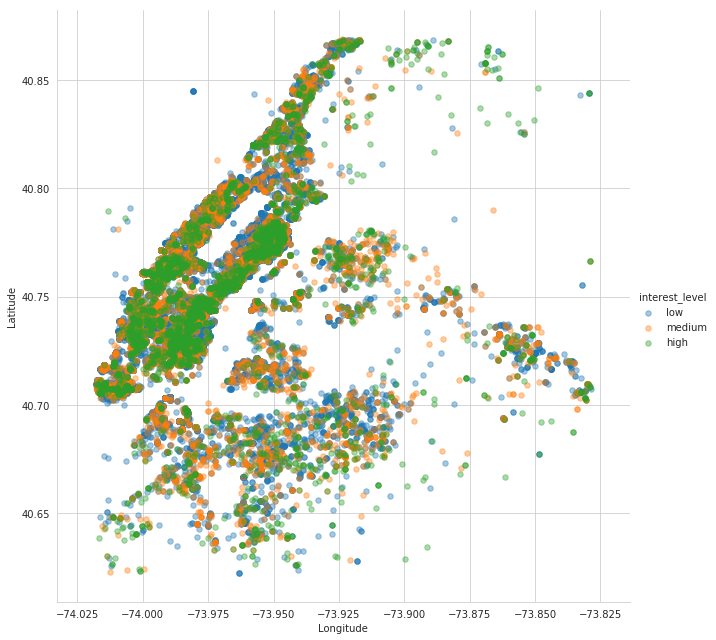

In [53]:
# Rent interest graph of New-York
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train_data[(train_data.longitude>train_data.longitude.quantile(0.005))
                           &(train_data.longitude<train_data.longitude.quantile(0.995))
                           &(train_data.latitude>train_data.latitude.quantile(0.005))                           
                           &(train_data.latitude<train_data.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

### Answer 3
* Geo factor here is a very important part and telling some stories. We can see from the above figure that most high interest level are focused on a certain area of the city. So we assume that's a really popular area for people to live and an active housing market area
* So the location of the listing really have a strong say on the interest level of the listing

## Price Distribution

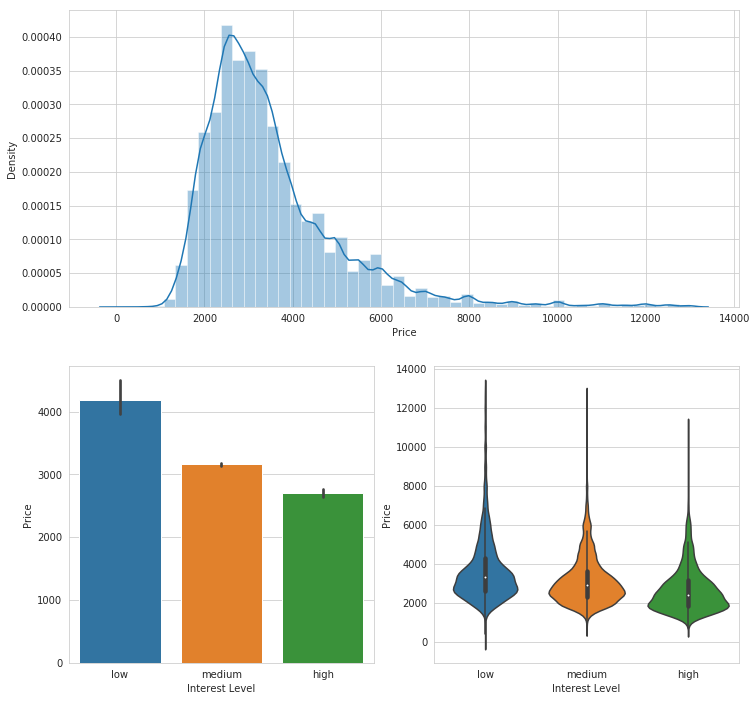

In [54]:
# Price exploration
fig = plt.figure(figsize=(12,12))
# Price distribution
sns.distplot(train_data.price[train_data.price<=train_data.price.quantile(0.99)], ax=plt.subplot(211));
plt.xlabel('Price');
plt.ylabel('Density');
# Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(223));
plt.xlabel('Interest Level');
plt.ylabel('Price');
# Violinplot of price for every Interest Level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
               data=train_data[train_data.price<=train_data.price.quantile(0.99)],
               ax=plt.subplot(224));
plt.xlabel('Interest Level');
plt.ylabel('Price');